In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

# Loading Dataset - insurance_data

In [92]:
data = pd.read_csv("insurance_data.csv")

In [93]:
data

,age,bought_insurance
0,22,0
1,25,0
2,46,1
3,56,1
4,55,1
5,60,1
6,62,1
7,61,1
8,18,0
9,28,0


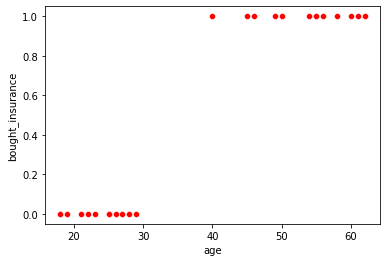

In [94]:
sns.scatterplot(data=data,x='age',y='bought_insurance',color='red');

In [95]:
data['bought_insurance'].value_counts()

1    13
0    12
Name: bought_insurance, dtype: int64

In [96]:
X = data.drop("bought_insurance", axis = 1)
Y = data.drop("age", axis = 1)

In [97]:
linear_regressor=LinearRegression().fit(X, Y)

In [98]:
linear_regressor.predict(X).flatten()

array([ 0.01679776,  0.10622944,  0.73225118,  1.03035678,  1.00054622,
        1.14959901,  1.20922013,  1.17940957, -0.10244448,  0.19566111,
        0.16585056,  0.22547167,  0.82168286,  1.00054622,  0.10622944,
        1.08997789, -0.07263392, -0.10244448, -0.0130128 ,  0.13604   ,
        0.55338783,  0.70244062,  0.85149342,  0.97073566,  0.04660832])

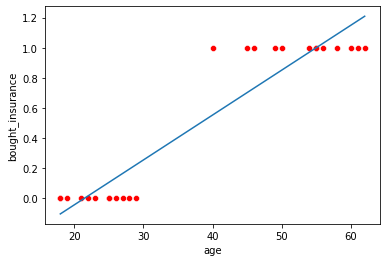

In [99]:
sns.scatterplot(data=data,x='age',y='bought_insurance',color='red');
sns.lineplot(x=data['age'].values,y=linear_regressor.predict(X).flatten());

In [103]:
data2=data.copy()

In [104]:
data2.loc[6,'age']=92

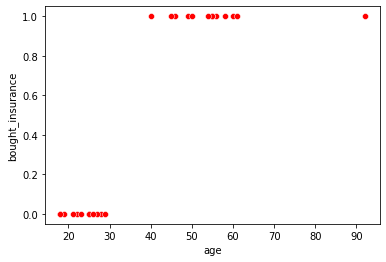

In [105]:
sns.scatterplot(data=data2,x='age',y='bought_insurance',color='red');

In [106]:
X2 = data2.drop("bought_insurance", axis = 1)
Y2 = data2.drop("age", axis = 1)
linear_regressor2=LinearRegression().fit(X2, Y2)

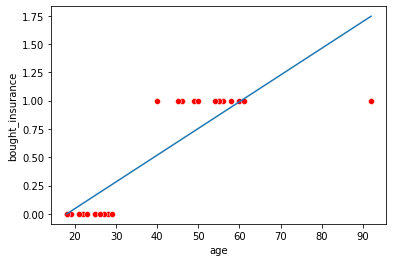

In [107]:
sns.scatterplot(data=data2,x='age',y='bought_insurance',color='red');
sns.lineplot(x=data2['age'].values,y=linear_regressor2.predict(X2).flatten());

Text(0.5, 1.0, 'Extreme values')

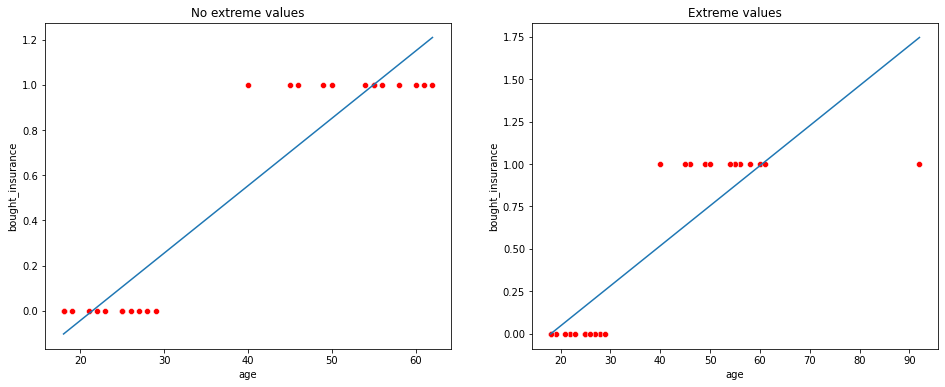

In [108]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=data,x='age',y='bought_insurance',color='red');
sns.lineplot(x=data['age'].values,y=linear_regressor.predict(X).flatten());
plt.title("No extreme values")


plt.subplot(1, 2, 2)
sns.scatterplot(data=data2,x='age',y='bought_insurance',color='red');
sns.lineplot(x=data2['age'].values,y=linear_regressor2.predict(X2).flatten());
plt.title("Extreme values")



# Logistic regression

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
model=LogisticRegression().fit(X, Y)

In [164]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [114]:
model.predict(X)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [163]:
X

,age
0,22
1,25
2,46
3,56
4,55
5,60
6,62
7,61
8,18
9,28


In [165]:
model.predict_proba(X)[0]

array([9.99704816e-01, 2.95184202e-04])

In [166]:
model.predict_proba(X)[0,0]  #1-p

0.9997048157976365

In [169]:
model.predict_proba(X)[0,1]  #p

0.00029518420236351796

In [170]:
model.predict_proba(X)[:,1]

array([2.95184202e-04, 1.89572522e-03, 9.98845877e-01, 9.99997666e-01,
       9.99995659e-01, 9.99999805e-01, 9.99999944e-01, 9.99999895e-01,
       2.46815870e-05, 1.20699045e-02, 6.52641313e-03, 2.22167032e-02,
       9.99820404e-01, 9.99995659e-01, 1.89572522e-03, 9.99999325e-01,
       4.59011162e-05, 2.46815870e-05, 1.58742421e-04, 3.51987706e-03,
       9.54372395e-01, 9.97855724e-01, 9.99903423e-01, 9.99991926e-01,
       5.48835617e-04])

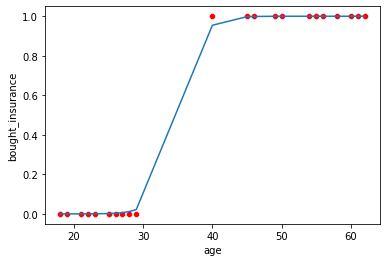

In [116]:
sns.scatterplot(data=data,x='age',y='bought_insurance',color='red');
sns.lineplot(x=data['age'].values,y=model.predict_proba(X)[:,1]);

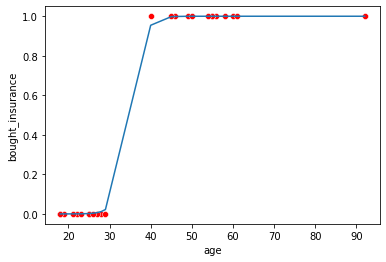

In [117]:
model2=LogisticRegression().fit(X2, Y2)
sns.scatterplot(data=data2,x='age',y='bought_insurance',color='red');
sns.lineplot(x=data2['age'].values,y=model2.predict_proba(X2)[:,1]);

Text(0.5, 1.0, 'Extreme values')

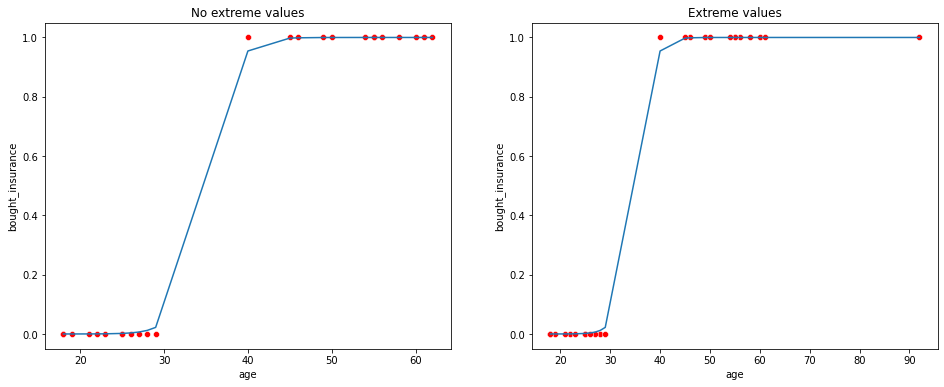

In [118]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=data,x='age',y='bought_insurance',color='red');
sns.lineplot(x=data['age'].values,y=model.predict_proba(X)[:,1]);
plt.title("No extreme values")


plt.subplot(1, 2, 2)
sns.scatterplot(data=data2,x='age',y='bought_insurance',color='red');
sns.lineplot(x=data2['age'].values,y=model2.predict_proba(X2)[:,1]);
plt.title("Extreme values")



# Sklearn Logistic Regression Class

In [311]:
classifier1=LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000,tol=0.00001).fit(X,Y)
classifier1.score(X,Y)

1.0

In [254]:
classifier1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 50,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 1e-05,
 'verbose': 0,
 'warm_start': False}

In [259]:
classifier1.set_params(**{'max_iter':10000,'solver':'saga'})

LogisticRegression(max_iter=10000, penalty='l1', solver='saga', tol=1e-05)

In [260]:
classifier1.fit(X,Y)
classifier1.score(X,Y)

1.0

In [201]:
classifier1.predict_proba(X)

array([[0.8603752 , 0.1396248 ],
       [0.79949938, 0.20050062],
       [0.15928992, 0.84071008],
       [0.0425202 , 0.9574798 ],
       [0.04883478, 0.95116522],
       [0.02425337, 0.97574663],
       [0.01825651, 0.98174349],
       [0.02104696, 0.97895304],
       [0.91673053, 0.08326947],
       [0.72069811, 0.27930189],
       [0.74894764, 0.25105236],
       [0.69058308, 0.30941692],
       [0.10921718, 0.89078282],
       [0.04883478, 0.95116522],
       [0.79949938, 0.20050062],
       [0.03215555, 0.96784445],
       [0.90496501, 0.09503499],
       [0.91673053, 0.08326947],
       [0.87691018, 0.12308982],
       [0.77523102, 0.22476898],
       [0.31151667, 0.68848333],
       [0.17969128, 0.82030872],
       [0.0958819 , 0.9041181 ],
       [0.05603225, 0.94396775],
       [0.8420192 , 0.1579808 ]])

In [203]:
np.log(0.8603752)

-0.15038670580685823

In [202]:
classifier1.predict_log_proba(X)

array([[-0.1503867 , -1.96879647],
       [-0.22376952, -1.60693795],
       [-1.83702936, -0.17350841],
       [-3.15777608, -0.04345065],
       [-3.01931248, -0.0500675 ],
       [-3.71919955, -0.02455233],
       [-4.00323333, -0.01842522],
       [-3.86099926, -0.0212716 ],
       [-0.08694171, -2.48567327],
       [-0.32753494, -1.27546203],
       [-0.28908621, -1.38209374],
       [-0.370219  , -1.17306564],
       [-2.21441693, -0.11565463],
       [-3.01931248, -0.0500675 ],
       [-0.22376952, -1.60693795],
       [-3.43717022, -0.0326839 ],
       [-0.099859  , -2.35351011],
       [-0.08694171, -2.48567327],
       [-0.13135071, -2.09484093],
       [-0.2545942 , -1.49268218],
       [-1.16630244, -0.37326417],
       [-1.71651503, -0.19807452],
       [-2.34463803, -0.10079529],
       [-2.88182781, -0.05766328],
       [-0.17195246, -1.84528178]])

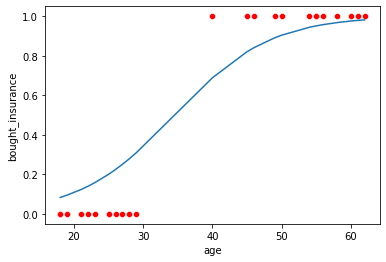

In [204]:
sns.scatterplot(data=data,x='age',y='bought_insurance',color='red');
sns.lineplot(x=data['age'].values,y=classifier1.predict_proba(X)[:,1]);

In [205]:
classifier1.classes_

array([0, 1], dtype=int64)

In [270]:
classifier1.coef_

array([[0.19649431]])

In [271]:
classifier1.intercept_

array([-6.91780295])

In [207]:
classifier1.n_features_in_

1

In [208]:
classifier1.feature_names_in_

array(['age'], dtype=object)

In [252]:
classifier1.n_iter_

array([31], dtype=int32)

# Methods

In [273]:
X

,age
0,22
1,25
2,46
3,56
4,55
5,60
6,62
7,61
8,18
9,28


In [272]:
print(classifier1.coef_,classifier1.intercept_)

[[0.19649431]] [-6.91780295]


In [276]:
# mx+c
0.19649431*22+(-6.91780295)

-2.5949281299999996

In [274]:
classifier1.decision_function(X)

array([-2.59492811, -2.00544518,  2.12093534,  4.08587845,  3.88938414,
        4.87185569,  5.26484431,  5.06835   , -3.38090536, -1.41596225,
       -1.61245656, -1.21946794,  2.71041827,  3.88938414, -2.00544518,
        4.47886707, -3.18441105, -3.38090536, -2.79142242, -1.80895087,
        0.94196948,  1.92444103,  2.90691258,  3.69288983, -2.3984338 ])

In [277]:
classifier1.predict_proba(X)[:,1] #p

array([0.06946555, 0.1186324 , 0.89292139, 0.98346948, 0.9799522 ,
       0.99239908, 0.9948564 , 0.99374656, 0.03289758, 0.19529536,
       0.16624783, 0.2280301 , 0.93763861, 0.9799522 , 0.1186324 ,
       0.98878103, 0.0397566 , 0.03289758, 0.05778946, 0.14076497,
       0.71949731, 0.87263285, 0.94818709, 0.975705  , 0.0832922 ])

In [312]:
classifier1.coef_

array([[0.14509722]])

In [317]:
classifier1.densify()

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', tol=1e-05)

In [318]:
classifier1.coef_

array([[0.14509722]])

In [320]:
classifier1.coef_[0,0]

0.14509722034322012

In [315]:
classifier1.sparsify()

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', tol=1e-05)

In [316]:
classifier1.coef_

<1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [289]:
print(classifier1.coef_)

  (0, 0)	0.19649431059087855


In [149]:
classifier1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [151]:
classifier1.set_params(**{'max_iter':1000})

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [153]:
print(classifier1.coef_)

  (0, 0)	0.14500442380215453


In [154]:
print(classifier1.score(X,Y))

1.0


In [307]:
#There is no strict definition regarding the proportion of zero-value elements for a matrix to qualify as sparse 
#but a common criterion is that the number of non-zero elements is roughly equal to the number of rows or columns. 
#By contrast, if most of the elements are non-zero, the matrix is considered dense

In [321]:
a=np.array([[1,2,0],[0,0,5],[3,9,0]])
a

array([[1, 2, 0],
       [0, 0, 5],
       [3, 9, 0]])

In [325]:
5/9

0.5555555555555556

In [324]:
print('sparsity =',np.round((4/9)*100,2),'%')

sparsity = 44.44 %


In [326]:
print('density =',np.round((5/9)*100,2),'%')

density = 55.56 %


In [295]:
from scipy.sparse import csr_matrix

In [327]:
csr_matrix(a)

<3x3 sparse matrix of type '<class 'numpy.intc'>'
	with 5 stored elements in Compressed Sparse Row format>

In [297]:
print(csr_matrix(a))

  (0, 0)	1
  (0, 1)	2
  (1, 2)	5
  (2, 0)	3
  (2, 1)	9
